# Using 5.1 - came with no memory 

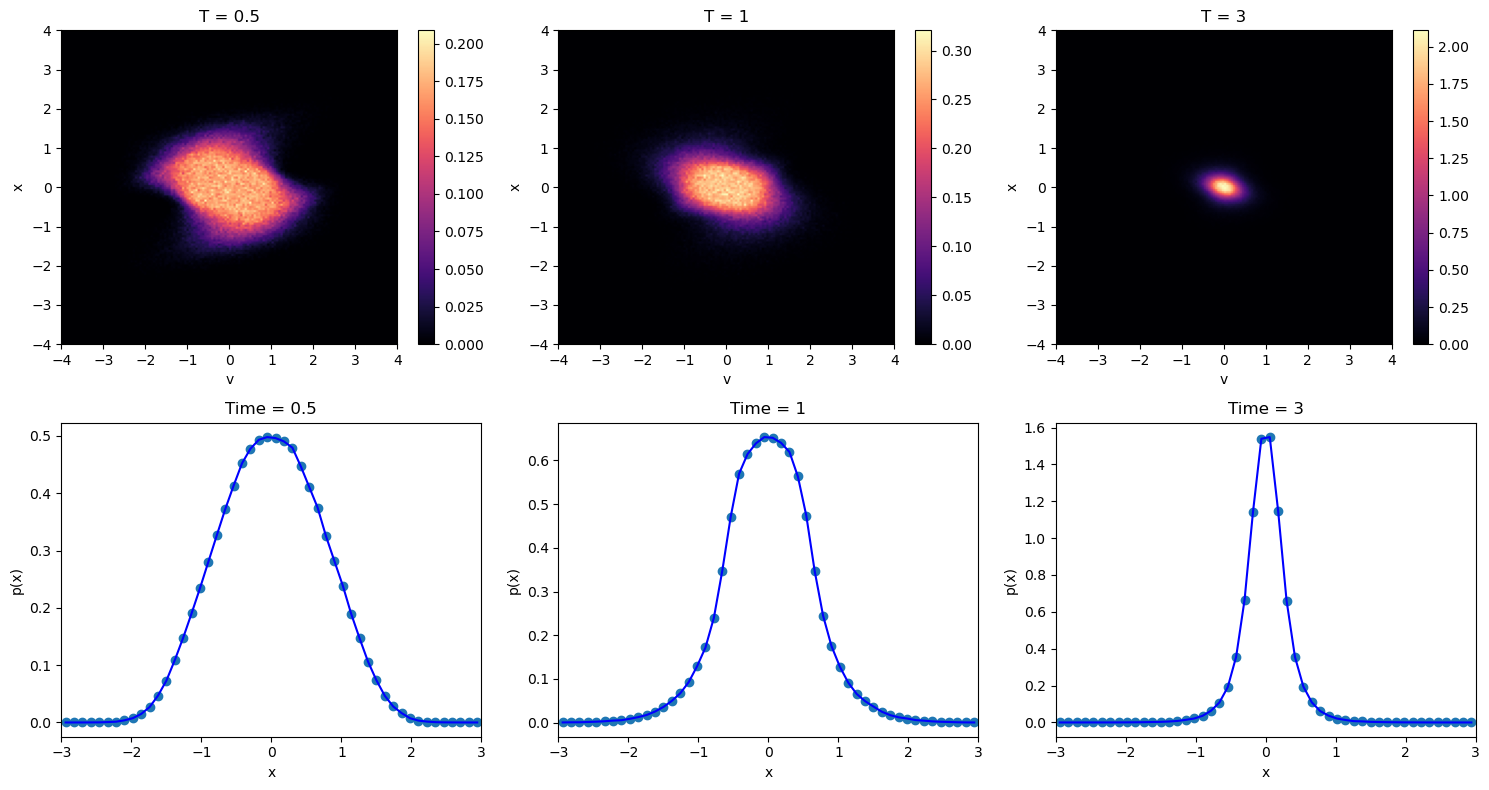

In [1]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np



d = 1

def F(X):
    '''
    Ackley function
    '''
    trm1 = -20 * np.exp(-0.2 * np.sqrt(1 / d * np.sum((X)**2, axis=0)))
    trm2 = -np.exp(1 / d * np.sum(np.cos(2 * np.pi * (X)), axis=0))
    return trm1 + trm2 + 20 * np.exp(1)


Vmax = 4
Xmax = 3
Xmin = -3

Number_particles = 500000

# Set up initialization 
# * 0.45 gives roughly right 
X = np.random.uniform(Xmin, Xmax, (d, Number_particles))*0.45
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.45


# As per definition for local best at it = 0 
local_best = X

time_points = [0.5, 1, 3]
positions_at_time_points = []

histograms = []

def mean_field(alpha, F, X):
    wa = np.exp(-alpha * F(X))
    Nalpha = np.sum(wa)

    if Nalpha != 0:
        X_alpha = np.sum(X * wa, axis=1) / Nalpha
    else:
        X_alpha = np.zeros_like(X[0])
    return X_alpha

T = 5
dt = 0.01


alpha = 30
sigma = 1 / np.sqrt(3)
lambd = 1
gamma = 0.5
m = 1 - gamma


for current_it in np.arange(0, T, dt):

    term1 = (lambd * dt) / (m + gamma * dt) * (mean_field(alpha, F, X) - X)
    term2 = ((sigma * np.sqrt(dt)) / (m + gamma * dt))* (mean_field(alpha, F, X) - X) * np.random.randn(1, Number_particles)
    V = (m / (m + gamma * dt)) * V + term1 + term2
    X = X +  dt*V
    
    if current_it in time_points:
        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[150, 150 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())

# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()


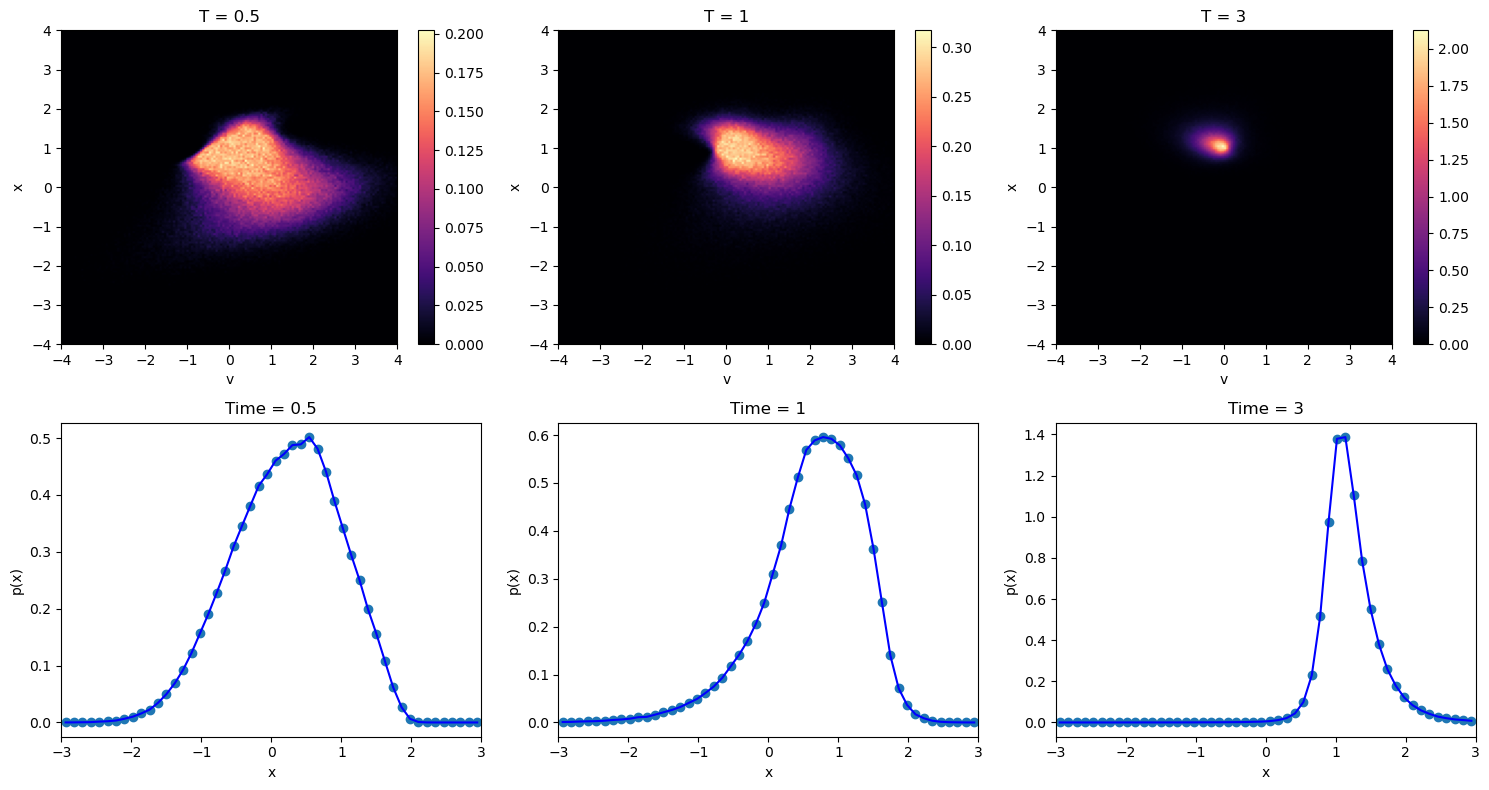

In [2]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

d = 1

def F(X):
    '''
    Shifted Ackley function to have a minimum at x = 1
    '''
    d = 1
    X_shifted = X - 1
    trm1 = -20 * np.exp(-0.2 * np.sqrt(1 / d * np.sum(X_shifted**2, axis=0)))
    trm2 = -np.exp(1 / d * np.sum(np.cos(2 * np.pi * X_shifted), axis=0))
    return trm1 + trm2 + 20 + np.exp(1)

Vmax = 4
Xmax = 3
Xmin = -3

Number_particles = 500000

# Set up initialization 
# * 0.45 gives roughly right 
X = np.random.uniform(Xmin, Xmax, (d, Number_particles))*0.45
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.45


# As per definition for local best at it = 0 
local_best = X

time_points = [0.5, 1, 3]
positions_at_time_points = []

histograms = []

def mean_field(alpha, F, X):
    wa = np.exp(-alpha * F(X))
    Nalpha = np.sum(wa)

    if Nalpha != 0:
        X_alpha = np.sum(X * wa, axis=1) / Nalpha
    else:
        X_alpha = np.zeros_like(X[0])
    return X_alpha

T = 5
dt = 0.01

alpha = 30
sigma = 1 / np.sqrt(3)
lambd = 1
gamma = 0.5
m = 1 - gamma

for current_it in np.arange(0, T, dt):

    term1 = (lambd * dt) / (m + gamma * dt) * (mean_field(alpha, F, X) - X)
    term2 = ((sigma * np.sqrt(dt)) / (m + gamma * dt))* (mean_field(alpha, F, X) - X) * np.random.randn(1, Number_particles)
    V = (m / (m + gamma * dt)) * V + term1 + term2
    X = X +  dt*V

    if current_it in time_points:
        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[150, 150 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())


# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()
